In [ ]:
# 1. Import Dataset

In [97]:
import pandas as pd

data = pd.read_csv('7275car.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
# 2. Data Preprocessing

In [ ]:
# 2.1. Drop the null values

In [98]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [99]:
data = data.dropna()
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [ ]:
# 2.2. Drop the unimportant columns

In [100]:
data = data.drop(['name','seller_type','owner','torque'],axis=1)
data.head()

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Manual,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Manual,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Manual,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Manual,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Manual,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [ ]:
# 2.3. Extract the values in some columns 

In [101]:
def RemainNumber(s:str):
    d = ""
    for i in list(s):
        if i.isdigit():
            d += i
    return eval(d)


data["mileage"] = data["mileage"].apply(RemainNumber)
data["engine"] = data["engine"].apply(RemainNumber)
data["max_power"] = data["max_power"].apply(RemainNumber)

In [102]:
data.head()

,year,selling_price,km_driven,fuel,transmission,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Manual,234,1248,74,5.0
1,2014,370000,120000,Diesel,Manual,2114,1498,10352,5.0
2,2006,158000,140000,Petrol,Manual,177,1497,78,5.0
3,2010,225000,127000,Diesel,Manual,230,1396,90,5.0
4,2007,130000,120000,Petrol,Manual,161,1298,882,5.0


In [ ]:
# 2.4. Observe the overall data distribution

In [103]:
data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,947.702378,1458.708829,2766.125348,5.416393
std,3.863695,8.135827e+05,5.679230e+04,925.336832,503.893057,5162.123778,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,35.000000,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,185.000000,1197.000000,100.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,240.000000,1248.000000,739.000000,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,1944.000000,1582.000000,3748.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,3344.000000,3604.000000,108495.000000,14.000000


In [ ]:
# 3. Exploratory Data Analysis (EDA) and Feature Selection

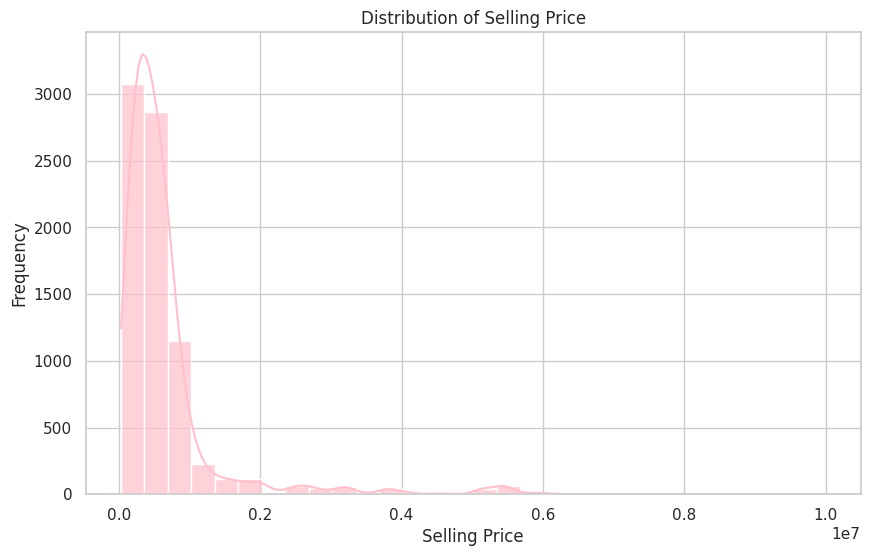

In [121]:
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data['selling_price'], kde=True, color="pink", bins=30, alpha=0.7)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

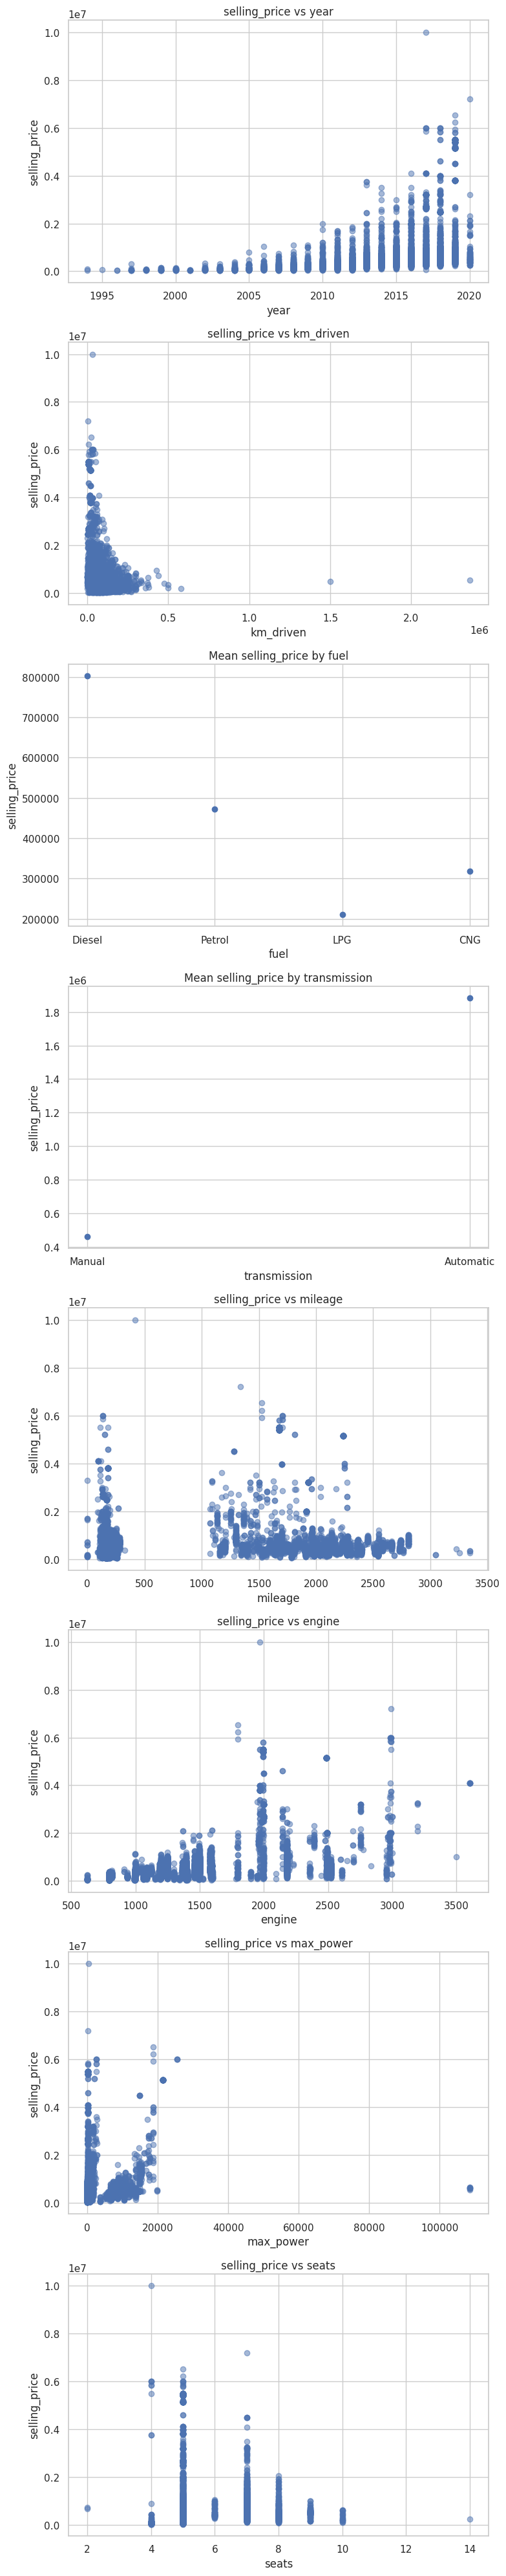

In [113]:
def plot_scatter(data, x_columns, y_column='selling_price'):
    num_plots = len(x_columns)
    fig, axs = plt.subplots(num_plots, 1, figsize=(8, 5 * num_plots))
    
    for i, x_col in enumerate(x_columns):
        if data[x_col].dtype == 'object':
            unique_vals = data[x_col].unique()
            means = data.groupby(x_col)[y_column].mean()
            axs[i].scatter(unique_vals, [means[val] for val in unique_vals], label=f'Mean {y_column} by {x_col}')
            axs[i].set_title(f'Mean {y_column} by {x_col}')
        else:
            axs[i].scatter(data[x_col], data[y_column], alpha=0.5)
            axs[i].set_title(f'{y_column} vs {x_col}')
        
        axs[i].set_xlabel(x_col)
        axs[i].set_ylabel(y_column)

    plt.tight_layout()
    plt.show()

x_columns = ['year', 'km_driven', 'fuel', 'transmission', 'mileage', 'engine', 'max_power', 'seats']

plot_scatter(data, x_columns)

In [ ]:
# 4. One-Hot Encoding

In [114]:
data = pd.get_dummies(data, columns=['fuel', 'transmission'])

In [115]:
data.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual
0,2014,450000,145500,234,1248,74,5.0,0,1,0,0,0,1
1,2014,370000,120000,2114,1498,10352,5.0,0,1,0,0,0,1
2,2006,158000,140000,177,1497,78,5.0,0,0,0,1,0,1
3,2010,225000,127000,230,1396,90,5.0,0,1,0,0,0,1
4,2007,130000,120000,161,1298,882,5.0,0,0,0,1,0,1


In [ ]:
# 5. Correlation analysis and feature selection

In [116]:
data.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual
year,1.000000,0.412302,-0.428548,0.248093,0.018263,0.248152,-0.007923,0.029095,0.037536,-0.059887,-0.034351,0.249002,-0.249002
selling_price,0.412302,1.000000,-0.222158,0.098988,0.455682,0.137042,0.041617,-0.033197,0.204831,-0.035978,-0.195074,0.590269,-0.590269
km_driven,-0.428548,-0.222158,1.000000,-0.079957,0.206031,-0.111612,0.227259,-0.005432,0.271662,0.023095,-0.274460,-0.201186,0.201186
mileage,0.248093,0.098988,-0.079957,1.000000,-0.035105,0.093732,-0.016067,0.039119,0.081268,-0.039956,-0.082471,0.006441,-0.006441
engine,0.018263,0.455682,0.206031,-0.035105,1.000000,0.025356,0.611103,-0.059850,0.507383,-0.056681,-0.491189,0.283206,-0.283206
max_power,0.248152,0.137042,-0.111612,0.093732,0.025356,1.000000,-0.071018,-0.011234,-0.025747,-0.019436,0.030227,0.107079,-0.107079
seats,-0.007923,0.041617,0.227259,-0.016067,0.611103,-0.071018,1.000000,-0.038587,0.354764,-0.028949,-0.345399,-0.072722,0.072722
fuel_CNG,0.029095,-0.033197,-0.005432,0.039119,-0.059850,-0.011234,-0.038587,1.000000,-0.088831,-0.005426,-0.072894,-0.031686,0.031686
fuel_Diesel,0.037536,0.204831,0.271662,0.081268,0.507383,-0.025747,0.354764,-0.088831,1.000000,-0.072800,-0.978020,-0.025579,0.025579
fuel_LPG,-0.059887,-0.035978,0.023095,-0.039956,-0.056681,-0.019436,-0.028949,-0.005426,-0.072800,1.000000,-0.059739,-0.025967,0.025967


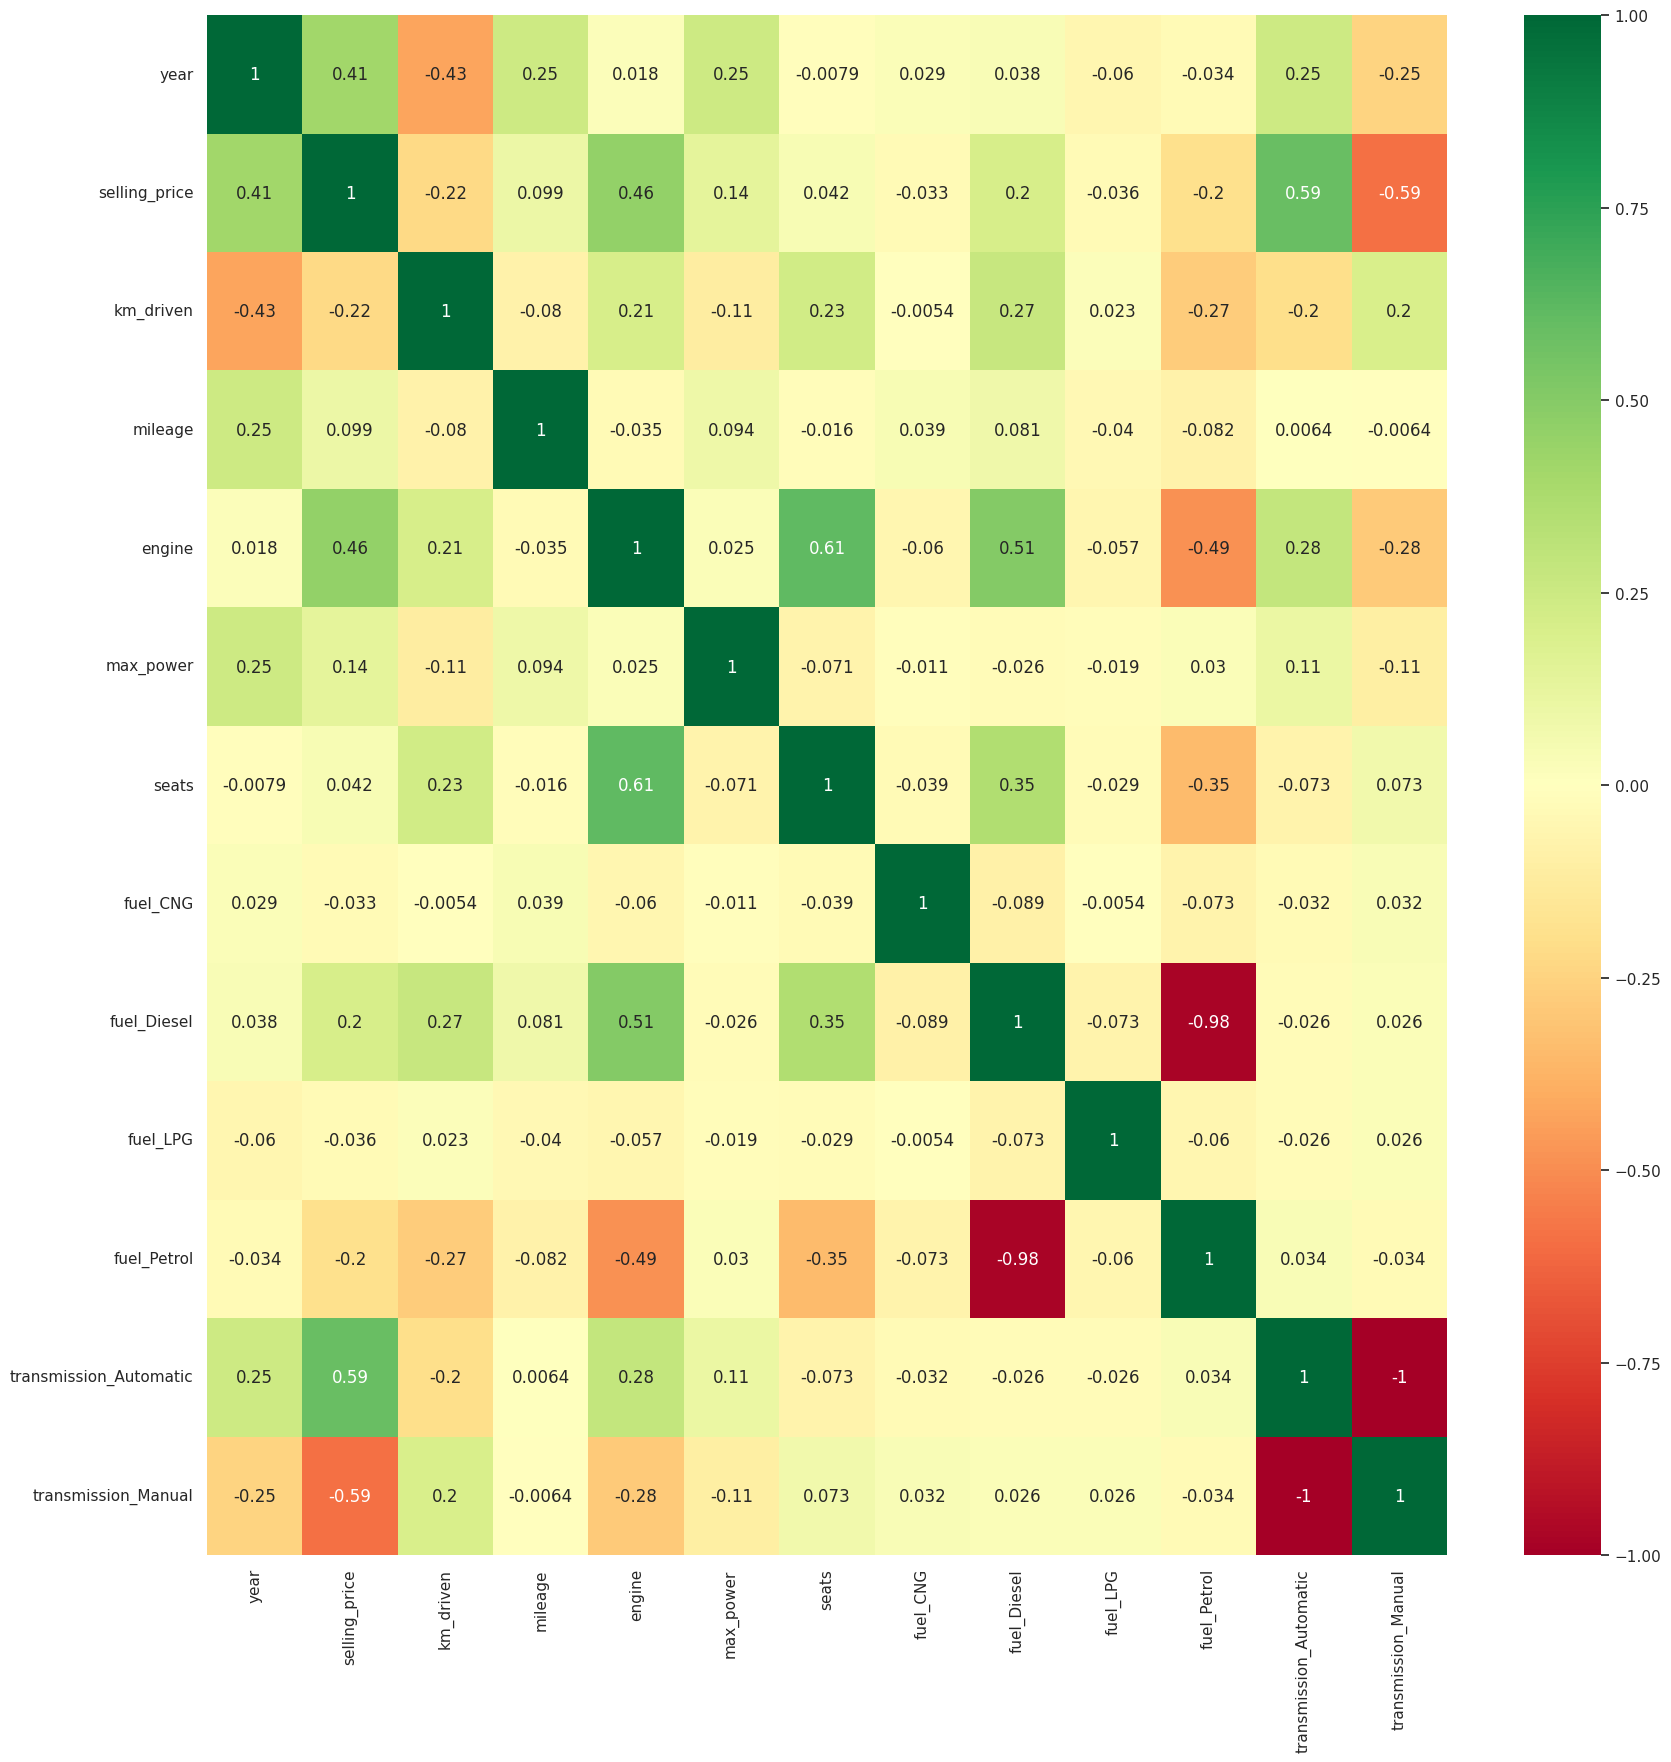

In [123]:
corrmat = data.corr()
top_feat = corrmat.index
plt.figure(figsize=(20,20))
h = sns.heatmap(data[top_feat].corr(), annot=True, cmap="RdYlGn")

In [ ]:
# 6. Model Implementation and Baseline Evaluation

In [132]:
# 6.1. Z-normalization
from sklearn.preprocessing import StandardScaler

numeric_features = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [128]:
data.head()

,year,selling_price,km_driven,mileage,engine,max_power,seats,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual
0,0.004158,-0.245613,1.343777,-0.771338,-0.418188,-0.521548,-0.434128,0,1,0,0,0,1
1,0.004158,-0.343950,0.894744,1.260483,0.077980,1.469619,-0.434128,0,1,0,0,0,1
2,-2.066530,-0.604542,1.246926,-0.832941,0.075995,-0.520773,-0.434128,0,0,0,1,0,1
3,-1.031186,-0.522185,1.018008,-0.775661,-0.124457,-0.518448,-0.434128,0,1,0,0,0,1
4,-1.807694,-0.638960,0.894744,-0.850233,-0.318955,-0.365013,-0.434128,0,0,0,1,0,1


In [ ]:
# 6.2. Split dataset into training and testing sets

In [131]:
from sklearn.model_selection import train_test_split

X = data.drop('selling_price', axis=1)
y = data['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((6324, 12), (1582, 12), (6324,), (1582,))

In [137]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# SVM
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

# Random Forests
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Netural Networks
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)

# Metrics
def evaluate_model(model_name, true_values, predicted_values):
    mse = mean_squared_error(true_values, predicted_values)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(true_values, predicted_values)
    r2 = r2_score(true_values, predicted_values)
    print(f"{model_name} - MSE: {mse:.2f}, RMSE: {rmse:.2f}, "
          f"MAE: {mae:.2f}, R2: {r2:.2f}")

evaluate_model("SVM", y_test, svr_predictions)
evaluate_model("Random Forests", y_test, rf_predictions)
evaluate_model("Neural Networks", y_test, nn_predictions)

SVM - MSE: 0.08, RMSE: 0.29, MAE: 0.15, R2: 0.92
Random Forests - MSE: 0.03, RMSE: 0.17, MAE: 0.08, R2: 0.97
Neural Networks - MSE: 0.07, RMSE: 0.26, MAE: 0.14, R2: 0.94


In [ ]:
# 7. Find optimal hyperparameters for every model using grid search

In [ ]:
# 7.1. Find optimal hyperparameters for SVM using grid search

In [140]:
from sklearn.model_selection import GridSearchCV

param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto']
}

svr = SVR()

grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=3, n_jobs=-1, verbose=2)
grid_search_svr.fit(X_train, y_train)
print("Best parameters for SVR:", grid_search_svr.best_params_)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.7s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.6s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.5s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.6s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.5s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   0.6s
[CV] END ......................C=0.1, gamma=auto

In [141]:
# Create new model with optimal hyperparameters
svr_optimized = SVR(**grid_search_svr.best_params_)
svr_optimized.fit(X_train, y_train)

svr_predictions = svr_optimized.predict(X_test)

evaluate_model("Optimized SVR", y_test, svr_predictions)

Optimized SVR - MSE: 0.06, RMSE: 0.25, MAE: 0.13, R2: 0.94


In [ ]:
# 7.2. Find optimal hyperparameters for Random Forests using grid search

In [142]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestRegressor()

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
print("Best parameters for RandomForestRegressor:", grid_search_rf.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END ma

In [143]:
# Create new model with optimal hyperparameters
rf_optimized = RandomForestRegressor(**grid_search_rf.best_params_)
rf_optimized.fit(X_train, y_train)

rf_predictions = rf_optimized.predict(X_test)

evaluate_model("Optimized RandomForestRegressor", y_test, rf_predictions)

Optimized RandomForestRegressor - MSE: 0.03, RMSE: 0.17, MAE: 0.08, R2: 0.97


In [ ]:
# 7.3. Find optimal hyperparameters for Netural Networks using grid search

In [144]:
from sklearn.neural_network import MLPRegressor

param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant','adaptive'],
}

nn = MLPRegressor(max_iter=1000)

grid_search_nn = GridSearchCV(estimator=nn, param_grid=param_grid_nn, cv=3, n_jobs=-1, verbose=2)
grid_search_nn.fit(X_train, y_train)
print("Best parameters for MLPRegressor:", grid_search_nn.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   4.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   4.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   4.7s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   3.6s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   3.8s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   2.5s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=sgd; total time=   4.4s
[CV] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive

In [145]:
# Create new model with optimal hyperparameters
nn_optimized = MLPRegressor(**grid_search_nn.best_params_)
nn_optimized.fit(X_train, y_train)

nn_predictions = nn_optimized.predict(X_test)

evaluate_model("Optimized MLPRegressor", y_test, nn_predictions)

/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Optimized MLPRegressor - MSE: 0.06, RMSE: 0.25, MAE: 0.14, R2: 0.94
